# Part I - (Dataset Exploration Title)
## by (your name here)

## Introduction
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.patheffects as pe


%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
term_counts = loans.Term.value_counts()

In [5]:
term_counts_sum = loans.Term.value_counts().sum()

In [6]:
max_term_counts = term_counts[0:1]


In [7]:
term_max_prop = max_term_counts/term_counts_sum


In [8]:
income_count=loans['IncomeRange'].value_counts()


In [32]:
income_order = income_count.index


In [9]:
loan_status = ['Completed','Current','Past Due(1-15days)','Defaulted','Chargedoff', 'Past Due(16-30 days)','cancelled', 'Past Due(31-60days)', 'Past Due(61-90 days)', 'Past Due(91-120 days)','FinalPayementinProgress', 'Past Due (>120 days)']

In [13]:
loanstat.reset_index(drop=True, inplace=True)


In [12]:
loanstat = loans[loans['LoanStatus'].isin(loan_status)]


In [14]:
loanstat['LoanStatus'] = loanstat['LoanStatus'].astype('object')


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
loans['ListingCreationDate'] = pd.to_datetime(loans.ListingCreationDate)

In [6]:
loans['date'] = loans['ListingCreationDate'].dt.date

In [7]:
loans['time'] = loans['ListingCreationDate'].dt.time


In [8]:
loans = loans.drop(['ListingCreationDate'], axis=1)

In [9]:
loans.head()

,ListingKey,ListingNumber,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,date,time
0,1021339766868145413AB3B,193129,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,...,0.0,0.0,0.0,1.0,0,0,0.0,258,2007-08-26,19:09:29.263000
1,10273602499503308B223C1,1209647,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,...,0.0,0.0,0.0,1.0,0,0,0.0,1,2014-02-27,08:28:07.900000
2,0EE9337825851032864889A,81716,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,...,0.0,0.0,0.0,1.0,0,0,0.0,41,2007-01-05,15:00:47.090000
3,0EF5356002482715299901A,658116,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,...,0.0,0.0,0.0,1.0,0,0,0.0,158,2012-10-22,11:02:35.010000
4,0F023589499656230C5E3E2,909464,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,...,0.0,0.0,0.0,1.0,0,0,0.0,20,2013-09-14,18:38:39.097000


### What is the structure of your dataset?

#####  The dataset contains 113937 and 80 features rangin from listingkey to investors. Most variables are numeric in nature, but variables Listingkey, loanstatus, CreditGrade etc are order factor variables with the following.

##### LoanStatus: completed, Current, Pastdue(1-15days), defaulted, chargedoff, Pastdue(16-30days), Cancelled,Pastdue(31-60days), Pastdue(91-120days), Final payment in Progress, Pastdue(>120days)

##### Occupation: Professional, Executive, student -Freshmen, Computer programmer etc

##### CreditGrade : C, HR, AA, D, B, E, A, NC


### What is/are the main feature(s) of interest in your dataset?

##### My main interest is looking  who are high, medium and average Income earners. How those income Range affect Borrower APR, BorrowerRate  and Credit Score, Occupation, Employemnet status, Loan status.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

##### I believe the type of creditgrade,CreditScores, BorrowerAPR, occupation, Credit Score.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


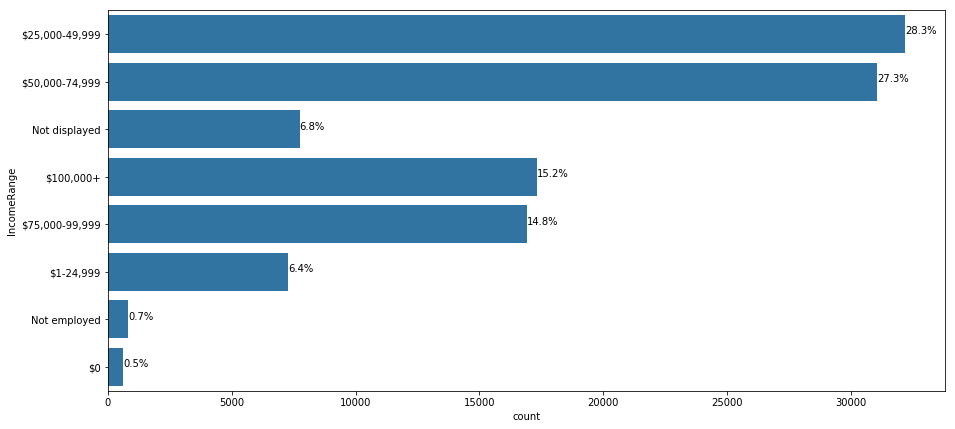

In [88]:
# lets see the income of the borrowers. 
plt.figure(figsize = [15, 7])
default_color = sb.color_palette()[0]
sb.countplot(data = loans, y = 'IncomeRange', color = default_color)

loan_count=loans['IncomeRange'].value_counts()
locs,labels=plt.yticks()
for loc,label in zip(locs,labels):
    count=loan_count[label.get_text()]
    pct_string= "{:0.1f}%".format(100*count/loans.shape[0])
    plt.text(y=loc, x=count, s=pct_string,ha="left",fontsize='medium')
# plt.xticks(rotation=90)
# plt.show()

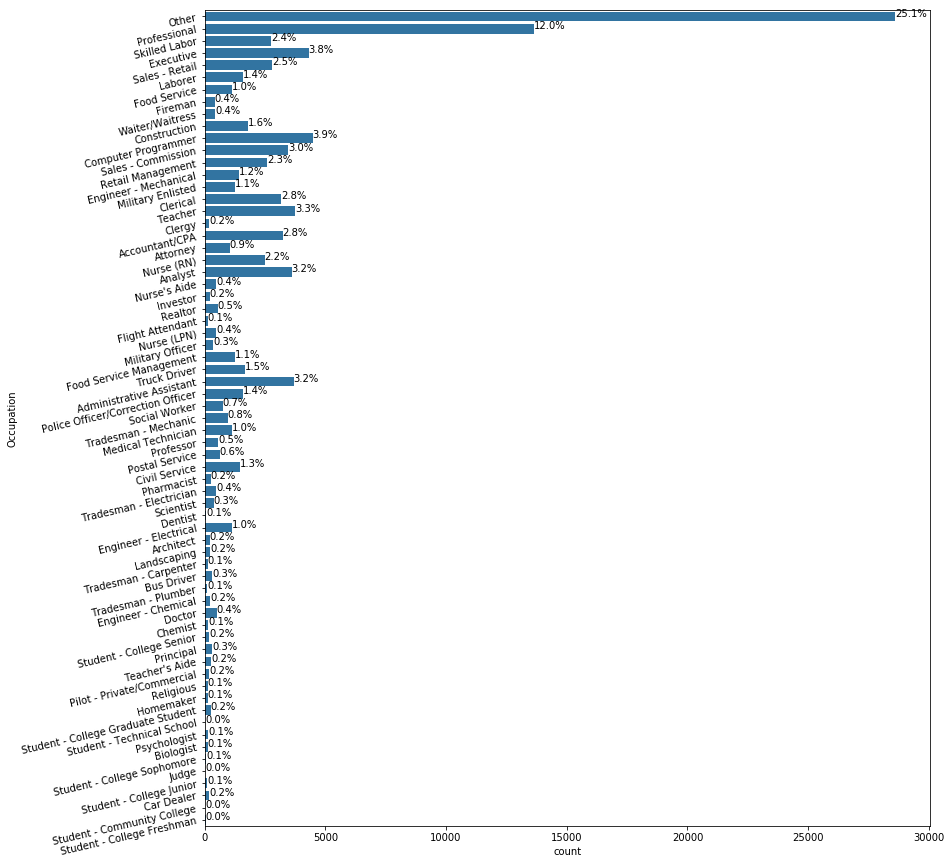

In [131]:
#  An Examination of the Employment of Borrowers by the Prosper lenders
plt.figure(figsize = [13, 15])
default_color = sb.color_palette()[0]
sb.countplot(data = loans, y = 'Occupation', color = default_color)
plt.yticks(rotation=13)

loan_count=loans['Occupation'].value_counts()
locs,labels=plt.yticks()
for loc,label in zip(locs,labels):
    count=loan_count[label.get_text()]
    pct_string= "{:0.1f}%".format(100*count/loans.shape[0])
    plt.text(y=loc, x=count, s=pct_string,ha="left",fontsize='medium')





# plt.xticks(rotation=90)
# plt.show()

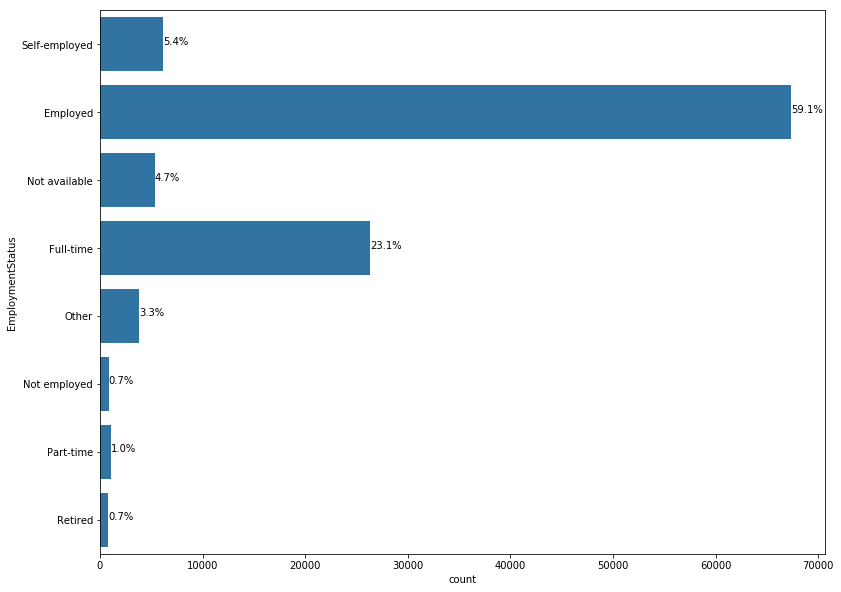

In [129]:
#  An Examination of the Employment of Borrowers by the Prosper lenders
plt.figure(figsize = [13, 10])
default_color = sb.color_palette()[0]
sb.countplot(data = loans, y = 'EmploymentStatus',color = default_color)

loan_count=loans['EmploymentStatus'].value_counts()
locs,labels=plt.yticks()
for loc,label in zip(locs,labels):
    count=loan_count[label.get_text()]
    pct_string= "{:0.1f}%".format(100*count/loans.shape[0])
    plt.text(y=loc, x=count, s=pct_string,ha="left",fontsize='medium')

# plt.xticks(rotation=90)
# plt.show()

In [14]:
loans[['CreditScoreRangeLower', 'CreditScoreRangeUpper']] = loans[['CreditScoreRangeLower', 'CreditScoreRangeUpper']].astype('str')


In [15]:
loans['CreditScore'] = loans[['CreditScoreRangeLower', 'CreditScoreRangeUpper']].agg('-'.join, axis=1)

In [149]:
CreditScore.dropna.

<bound method Series.dropna of 0         640.0-659.0
1         680.0-699.0
2         480.0-499.0
3         800.0-819.0
4         680.0-699.0
5         740.0-759.0
6         680.0-699.0
7         700.0-719.0
8         820.0-839.0
9         820.0-839.0
10        640.0-659.0
11        640.0-659.0
12        680.0-699.0
13        740.0-759.0
14        740.0-759.0
15        700.0-719.0
16        640.0-659.0
17        760.0-779.0
18        740.0-759.0
19        680.0-699.0
20        660.0-679.0
21        620.0-639.0
22        700.0-719.0
23        680.0-699.0
24        660.0-679.0
25        680.0-699.0
26        660.0-679.0
27        700.0-719.0
28        720.0-739.0
29        740.0-759.0
             ...     
113907    640.0-659.0
113908    700.0-719.0
113909    800.0-819.0
113910    640.0-659.0
113911    660.0-679.0
113912    800.0-819.0
113913    780.0-799.0
113914    520.0-539.0
113915    620.0-639.0
113916    660.0-679.0
113917    660.0-679.0
113918    740.0-759.0
113919    680.0-699.0
1

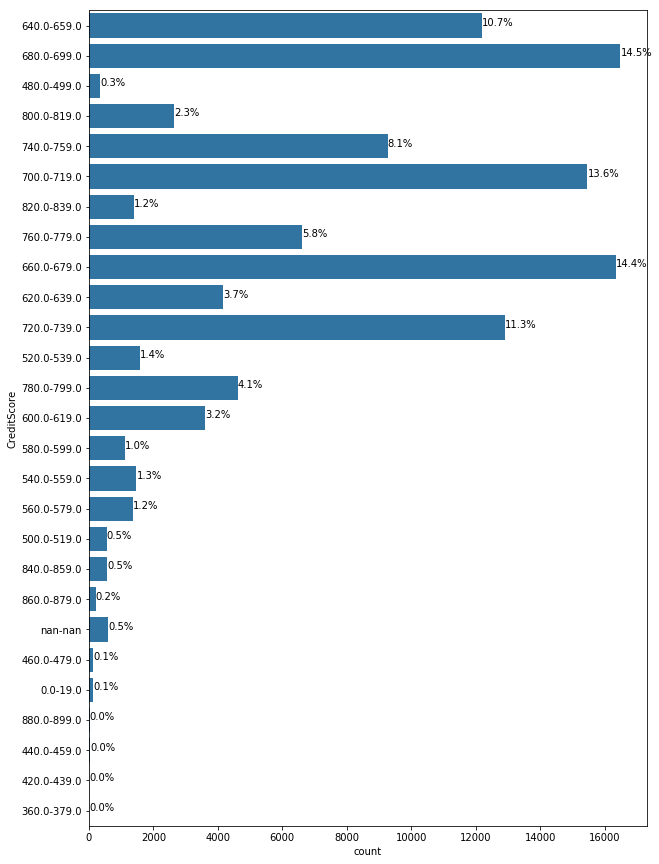

In [126]:
# An examination of whether the employemnt status which is source of the income is verified by prosper.
plt.figure(figsize = [10, 15])

sb.countplot(data = loans, y = 'CreditScore', color = default_color)

loan_count=loans['CreditScore'].value_counts()
locs,labels=plt.yticks()
for loc,label in zip(locs,labels):
    count=loan_count[label.get_text()]
    pct_string= "{:0.1f}%".format(100*count/loans.shape[0])
    plt.text(y=loc, x=count, s=pct_string,ha="left",fontsize='medium')
# plt.xticks(rotation=90)
# plt.show()


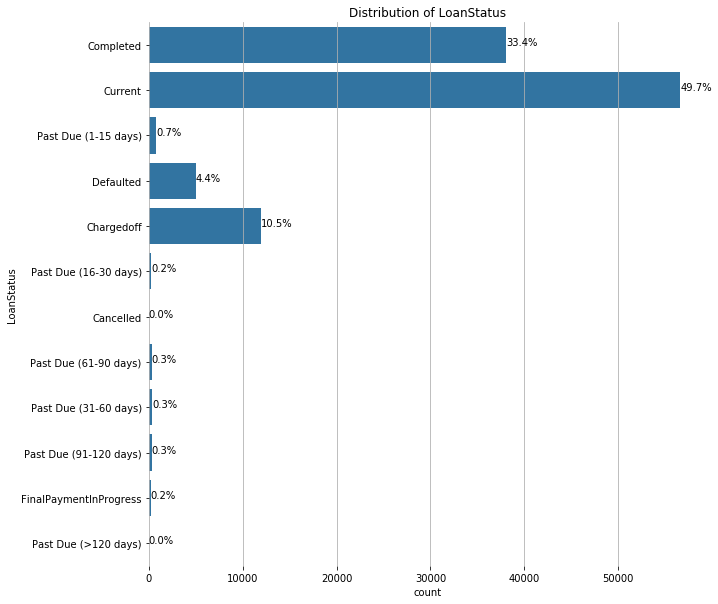

In [130]:
# A examination if the current loanstatus categorized by the lenders.
plt.figure(figsize = [10, 10])
default_color = sb.color_palette()[0]
sb.countplot(data = loans, y = 'LoanStatus', color = default_color)
sb.despine(bottom=True, left=True)
plt.grid(axis='x')
plt.title('Distribution of LoanStatus');
# plt.xticks(rotation=90)
# plt.show()

loan_count=loans['LoanStatus'].value_counts()
locs,labels=plt.yticks()
for loc,label in zip(locs,labels):
    count=loan_count[label.get_text()]
    pct_string= "{:0.1f}%".format(100*count/loans.shape[0])
    plt.text(y=loc, x=count, s=pct_string,ha="left",fontsize='medium')

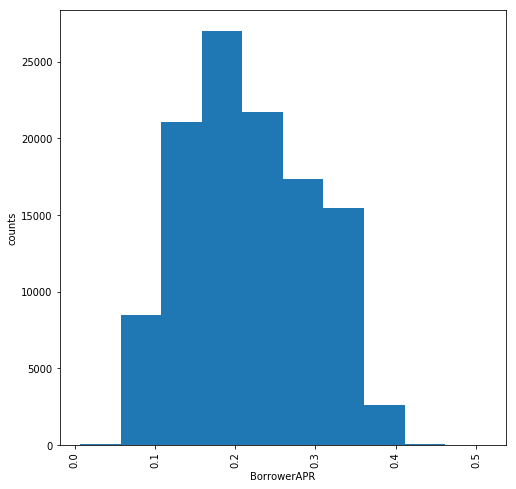

In [12]:
plt.figure(figsize = [8, 8])
loans['BorrowerAPR'].plot(kind='hist')
plt.xticks(rotation=90)
plt.xlabel('BorrowerAPR')
plt.ylabel('counts')
plt.show()






>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

##### Interest was place on the terms of the loans such as the months, employment satus of borrowers as well as loan status, also the income ranges listed by the lender as well as BorrowerAPR  & RATE.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

##### Loans Table has two varibles in one colum (Time and Date).
##### Merged CreditRange Upper and Lower together and changed dtype to Str.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [52]:
ordinal_var_dict = {'LoanStatus': ['Completed','Current','Past Due(1-15days)','Defaulted','Chargedoff', 'Past Due(16-30 days)','cancelled', 'Past Due(31-60days)', 'Past Due(61-90 days)', 'Past Due(91-120 days)','FinalPayementinProgress', 'Past Due (>120 days)'],
                    'EmploymentStatus': ['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other', 'Not employed', 'Part-time', 'Ritired'],
                    'CreditGrade': ['C', 'D', 'B', 'AA', 'HR', 'A', 'E', 'NC'],
                   'IncomeRange':['$25,000-49,999', '$50,000-74,999', '$75,000-99,999','$100,000+','Not displayed','Not employed']
}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        loans[var] = loans[var].astype(ordered_var)
    else: # pre-v0.21
        loans[var] = loans[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

In [135]:
loans.LoanStatus.isnull().sum()

0

In [150]:
loans.LoanStatus.nunique()


12

In [ ]:
# In following up from the looking at the loan status and the employment status separtely, it important to know how both these varibles interact.
plt.figure(figsize = [15, 7])
sb.countplot(data = loans, x = 'CreditScore', hue = 'BorrowerAPR', palette ='deep' ) 
plt.xticks(rotation=45)
plt.show()

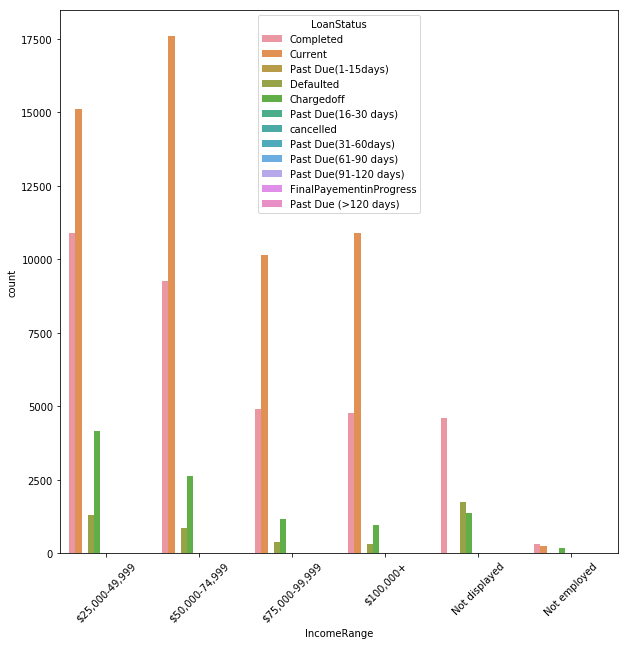

In [17]:
plt.figure(figsize = [10, 10])
# Also give that it borrower has a differnt income range how does this affect their ability to completed or default on there loans.
sb.countplot(data = loans, x = 'IncomeRange', hue = 'LoanStatus' ) 
plt.xticks(rotation=45)
plt.show()


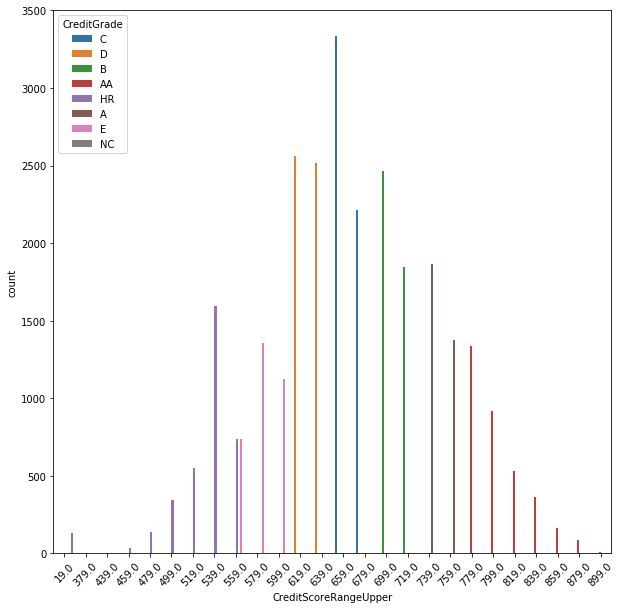

In [54]:
plt.figure(figsize = [10, 10])
# Does status of employment affect the credit grade  by prosper loans agency.
sb.countplot(data = loans, x = 'CreditScoreRangeUpper', hue = 'CreditGrade') 
plt.xticks(rotation=45)
plt.show()

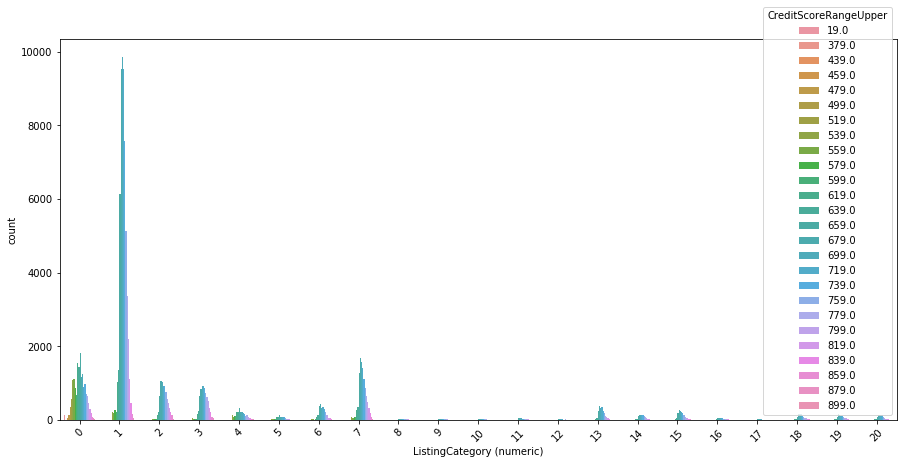

In [56]:
plt.figure(figsize = [15, 7])
#  Do borrowers income range determine the reasob for the type of loans.
sb.countplot(data = loans, x = 'ListingCategory (numeric)', hue = 'CreditScoreRangeUpper') 
plt.xticks(rotation=45)
plt.show()

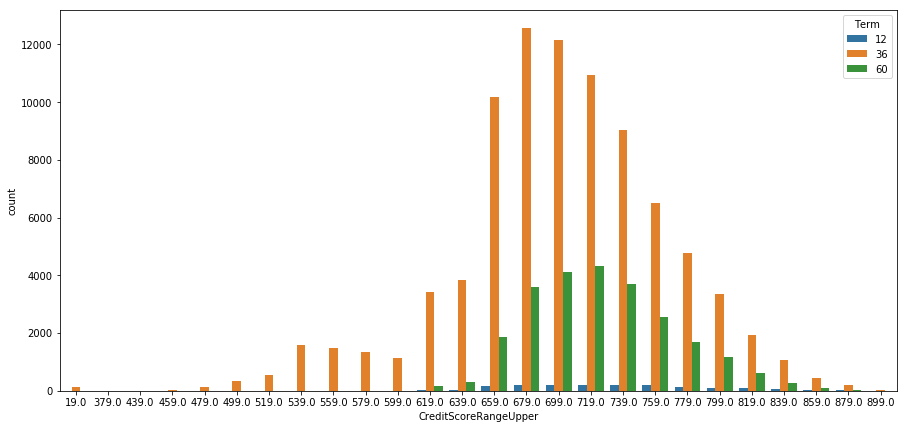

In [59]:
# Does the Employment status and level of employment affect the length of the loan taken by borrowers.
plt.figure(figsize = [15, 7])
sb.countplot(data = loans, x = 'CreditScoreRangeUpper', hue = 'Term') 
plt.show()

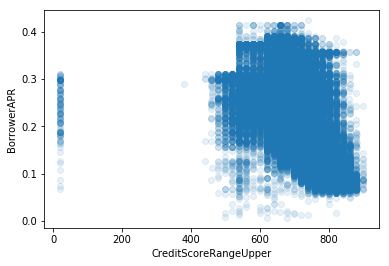

In [60]:
sb.regplot(data = loans, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', x_jitter = 0.3, scatter_kws = {'alpha' : 1/10},  fit_reg = False );

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

##### The relationship between employment status and loan status shows that more employed and full time employees have more current and completed that defaulted loans.
  
##### full time and employed borrower take short terms (36 months) as opposed to those who that take longer term loans (60 months)

##### More investor buy loans with AA and A, B, C  & D credit grades due to the high completed loans payements

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

 #####  The lowest Borrower APR is given to those with of less than 36 months and higher than 60 months.
 
 ##### Borrowers of 25000 - 49,000 have the highest C credit grade with 100,000 have the AA credit grade.



## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [24]:
medium_earners = loans[loans.IncomeRange <= '$75,000-99,999']

In [25]:
lower_earners = loans[loans.IncomeRange <= '$25,000-49,999']

In [26]:
Average_earners = loans[loans.IncomeRange <= '$50,000-74,999']

In [27]:
high_earner = loans[loans.IncomeRange > '$100,000+']

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

